## Importing packages

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

pd.set_option('display.max_columns', None)

## Importing data

In [2]:
train_data = pd.read_csv('../data/5_train_dataset.csv')
test_data = pd.read_csv('../data/4_test_dataset.csv')

Getting X & y

In [3]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [4]:
random_forest = RandomForestClassifier()

Initialise parameter grid for randomized search

In [5]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Run randomized search on Random Forest

In [6]:
rf_random = RandomizedSearchCV(estimator= random_forest,
                  param_distributions= parameter_grid,
                  scoring= "recall",
                  n_iter = 100,
                  verbose= 4)

In [7]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=0.866 total time=   4.6s
[CV 2/5] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=0.854 total time=   4.6s
[CV 3/5] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=0.882 total time=   4.6s
[CV 4/5] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=0.912 total time=   4.4s
[CV 5/5] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=0.851 total time=   4.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.835 total time=   7.2s
[CV 2/

[CV 4/5] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=0.908 total time=   6.8s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;, score=0.835 total time=   7.0s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.866 total time=   5.6s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.862 total time=   5.8s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.889 total time=   6.1s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.916 total time=   6.1s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=log2, min_samples_

[CV 3/5] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=0.866 total time=   4.3s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=0.893 total time=   4.5s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=0.828 total time=   4.4s
[CV 1/5] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.858 total time=   4.6s
[CV 2/5] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.847 total time=   4.6s
[CV 3/5] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.874 total time=   4.8s
[CV 4/5] END bootstrap=False, max_depth=70, max_features=log2, min_sample

[CV 1/5] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.851 total time=  12.1s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.843 total time=  10.7s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.870 total time=  11.9s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.897 total time=  13.0s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.839 total time=  10.9s
[CV 1/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=0.843 total time=   3.8s
[CV 2/5] END bootstrap=True, max_depth=60, max_features=sqrt, min_sample

[CV 5/5] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600;, score=0.839 total time=   8.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.839 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.831 total time=   1.1s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.866 total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.885 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.808 total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2,

[CV 4/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800;, score=0.905 total time=  13.8s
[CV 5/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800;, score=0.847 total time=  13.9s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.854 total time=   1.6s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.877 total time=   1.7s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.878 total time=   1.5s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.916 total time=   1.5s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_s

[CV 2/5] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=0.851 total time=   3.5s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=0.882 total time=   3.2s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=0.905 total time=   3.2s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=0.843 total time=   3.2s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.839 total time=   1.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.835 total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf

[CV 1/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.858 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.843 total time=   4.2s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.863 total time=   4.1s
[CV 4/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.897 total time=   4.1s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.835 total time=   4.1s
[CV 1/5] END bootstrap=False, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=0.866 total time=   6.1s
[CV 2/5] END bootstrap=False, max_depth=110, max_features=log2, min_samples

[CV 5/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000;, score=0.847 total time=   6.6s
[CV 1/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.858 total time=   1.3s
[CV 2/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.843 total time=   1.3s
[CV 3/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.882 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.908 total time=   1.3s
[CV 5/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.847 total time=   1.3s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=sqrt, min_sa

[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.863 total time=   1.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.885 total time=   1.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.808 total time=   1.2s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=0.866 total time=   5.4s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=0.870 total time=   5.5s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=0.878 total time=   5.3s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, mi

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='recall', verbose=4)

In [8]:
print(f'Best hyper-parameters are: {rf_random.best_params_}\nRecall is: {round(rf_random.best_score_ * 100, 2)}%')

Best hyper-parameters are: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 60, 'bootstrap': False}
Recall is: 88.52%


## Ideal model

In [9]:
random_forest = rf_random

Training and getting predictions

In [10]:
y_pred = random_forest.predict(X_test)

Getting results

In [17]:
acc_result = accuracy_score(y_test, y_pred)
recall_result = recall_score(y_test, y_pred)
precision_result = precision_score(y_test, y_pred)
f1_result = f1_score(y_test, y_pred)
roc_auc_result = roc_auc_score(y_test, y_pred)
print(f'Accuracy score is : {round(acc_result*100, 2)}%')
print(f'Recall score is : {round(recall_result*100, 2)}%')
print(f'Precision score is : {round(precision_result*100, 2)}%')
print(f'F1 score is : {round(f1_result*100, 2)}%')
print(f'ROC AUC score is: {round(roc_auc_result*100,2)}%')

Accuracy score is : 97.4%
Recall score is : 90.02%
Precision score is : 98.12%
F1 score is : 93.9%
ROC AUC score is: 94.77%


In [13]:
from sklearn.inspection import permutation_importance

r = permutation_importance(rf_random, X_test, y_test, scoring = 'recall',
                           n_repeats=30,
                           random_state=0)
# Get feature importances and their names
feature_importances = r.importances_mean
feature_names = X_test.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

NameError: name 'plt' is not defined

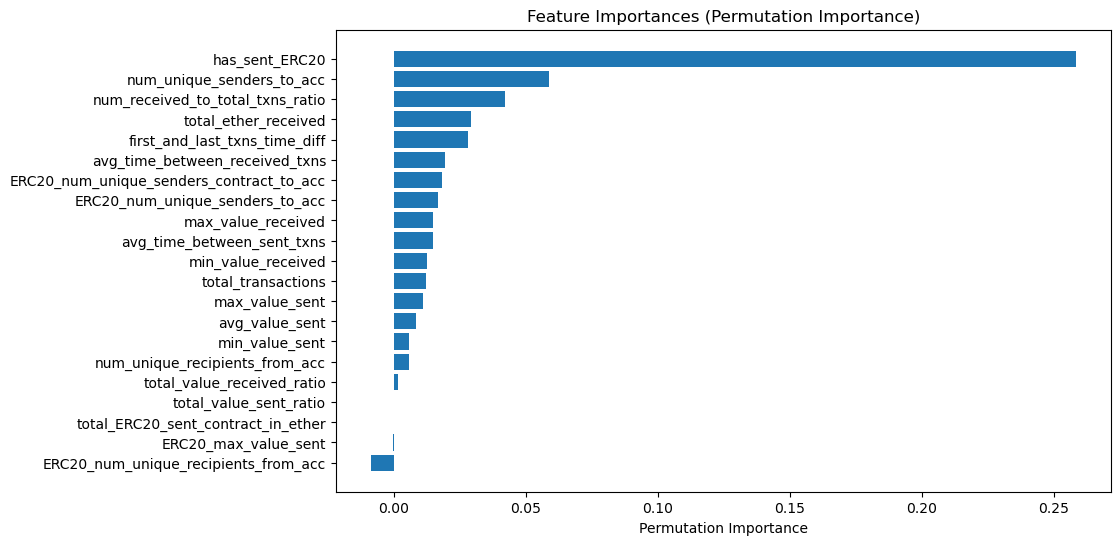

In [14]:
import matplotlib.pyplot as plt
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances[::-1], align="center")
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names[::-1])
plt.xlabel("Permutation Importance")
plt.title("Feature Importances (Permutation Importance)")
plt.show()

In [15]:
import joblib
joblib.dump(random_forest, '../models/random_forest.joblib')

['../models/random_forest.joblib']